# Dataset evaluation based on Silhouette score

This script uses extracted image features to calculate a dataset based score of dataset classification difficulty using the Silhouette score. This script was used for dataset difficulty estimation of the conference paper by Thornblad et al. [1]. 

The Silhouette score (SIL) is a metric which is based on both the interclass and intraclass variation within a dataset. This score uses Euclidean distances between image features of each sample to another. The average feature distance between images of the same class ($a_i$) and of different classes ($b_i$) is calculated for each sample. The Silhouette score, per sample ($s_i$), is then determined using the following equation:


\begin{equation}
    s_i = 
    \begin{cases}
      1 - a_i /b_i & \text{if } a_i < b_i  \\
      0 & \text{if } a_i = b_i \\
      b_i /a_i - 1  & \text{if } a_i > b_i
    \end{cases} 
\end{equation}

The Silhouette score for the full dataset (SIL) is defined as the average of the individual $s_i$ scores, of all samples. 



[1] Estimating the difficulty of medical classification tasks using 3D image datasets, Thornblad et al., 2025


In [ ]:
import numpy as np
import os
from scipy.stats import linregress
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats
import utils

In [ ]:
# Paths for project
# Ovarian paths
data_p = './Dataset_ovarian'
preprocessed_p = './Dataset_ovarian/Preprocessed_data_RADIOMICS'

# Pancreas paths
data_p = './Pancreas_cropped'
preprocessed_p = './Pancreas_cropped/Preprocessed_data_RADIOMICS'


# LIDC paths 
data_p = './NIFTI-LIDC'
preprocessed_p = './NIFTI-LIDC/Preprocessed_data_RADIOMICS'

# Liver dataset paths
data_p = './Liver_LITS17'
preprocessed_p = './Liver_LITS17/Preprocessed_data_RADIOMICS'

# FractureMNIST3D
data_p = './MedMNIST/FractureMNIST3D'
preprocessed_p = './MedMNIST/FractureMNIST3D/Preprocessed_data_RADIOMICS'


## Plot features

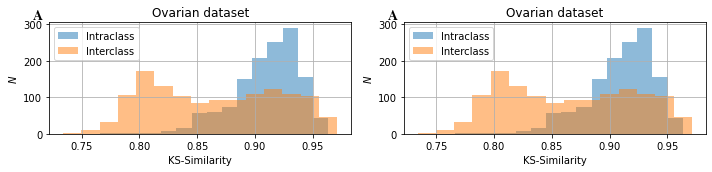

In [ ]:
feature_json_path = preprocessed_p
size_subset = 300

feature_data_1, feature_data_sub = utils.load_features(feature_json_path, size_subset)

utils.plot_features(feature_data_1, feature_data_sub)


## Sillhouette score calc

Gives a score based on average euclidian distances within class and between classes

Score ranges between [-1, 1] where higher number is better separation

Duration 2.4s for dataset of 380 CT samples (with pre extracted features)


### Calculate SIL score for one datset

In [ ]:
## Calculate Silhouette score for a dataset

feature_json_path = preprocessed_p 

full_dataset_features, class_1_features, IDs_class1, class_0_features, IDs_class0 = utils.load_features_full_dataset_with_IDs(feature_json_path)


sil_vals = utils.SIL_score_calc(class_0_features, class_1_features, IDs_class0, IDs_class1)
print(np.average(np.array(sil_vals)))     # Score ranges between [-1, 1] where higher number is better separation

### Sillhouette score bootstrapping calculation


In [ ]:
feature_json_path = preprocessed_p

full_dataset_features, class_1_features, IDs_class1, class_0_features, IDs_class0 = utils.load_features_full_dataset_with_IDs(feature_json_path)

val_array = utils.bootstrap_with_blocks(class_0_features, class_1_features, IDs_class0, IDs_class1, utils.SIL_score_calc, n_sessions=1000, b_0=0.6, b_1=0.6)

### Silhouette score calculation with bootstrapping over multiple datasets

In [ ]:
### Script for radiomic encoded features
# Paths for project
# Ovarian paths
ovarian_preprocessed_p = './Dataset_ovarian/Preprocessed_data_RADIOMICS'

# Pancreas paths
pancreas_preprocessed_p = './Pancreas_cropped/Preprocessed_data_RADIOMICS'


# LIDC paths Eloy processed
LIDC_preprocessed_p = './NIFTI-LIDC/Preprocessed_data_RADIOMICS'

# FractionMNIST paths
MNIST_preprocessed_p = './MedMNIST/FractureMNIST3D/Preprocessed_data_RADIOMICS'

Liver_preprocessed_p = './Liver_LITS17/Preprocessed_data_RADIOMICS'



preprocessing_paths = [ovarian_preprocessed_p, pancreas_preprocessed_p, MNIST_preprocessed_p, LIDC_preprocessed_p, Liver_preprocessed_p]
dataset_names = ['Ovarian', 'Pancreas', 'MNIST', 'LIDC', 'Liver']

# preprocessing_paths = [ovarian_preprocessed_p, pancreas_preprocessed_p, MNIST_preprocessed_p, LIDC_preprocessed_p]
# dataset_names = ['Ovarian', 'Pancreas', 'MNIST', 'LIDC']
val_lists = []
for dataset_i in range(2, len(dataset_names)):
    data_name = dataset_names[dataset_i]
    print(f'Now processing dataset {dataset_i} ({data_name})...')
    preprocessed_path_i = preprocessing_paths[dataset_i]
    feature_json_path = preprocessed_path_i
    full_dataset_features, class_1_features, IDs_class1, class_0_features, IDs_class0 = utils.load_features_full_dataset_with_IDs(feature_json_path)
    val_array = utils.bootstrap_with_blocks(class_0_features, class_1_features, IDs_class0, IDs_class1, utils.SIL_score_calc, n_sessions=1000, b_0=0.6, b_1=0.6)
    
    val_lists.append(np.array(val_array))

    path = './Silhouette_score/Bootstrapping_scores'
    file_name = f'SIL_scores_{data_name}.csv'
    csv_save_path = os.path.join(path, file_name)

    with open(csv_save_path, 'w', newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)

        wr.writerow(val_array)

In [ ]:
### Script for MedicalNet encoded features
# Paths for project
# Ovarian paths
base_p = './Fréchet_inception_distance/image_features_MedicalNet'

# Ovarian paths
ovarian_preprocessed_p = './Dataset_ovarian/Preprocessed_data_RADIOMICS'

# Pancreas paths
pancreas_preprocessed_p = './Pancreas_cropped/Preprocessed_data_RADIOMICS'


# LIDC paths Eloy processed
LIDC_preprocessed_p = './NIFTI-LIDC/Preprocessed_data_RADIOMICS'

# FractionMNIST paths
MNIST_preprocessed_p = './MedMNIST/FractureMNIST3D/Preprocessed_data_RADIOMICS'

Liver_preprocessed_p = './Liver_LITS17/Preprocessed_data_RADIOMICS'



preprocessing_paths = [ovarian_preprocessed_p, pancreas_preprocessed_p, LIDC_preprocessed_p, MNIST_preprocessed_p, Liver_preprocessed_p]
dataset_names_json = ['Ovarian', 'Pancreas', 'LIDC', 'MNIST', 'liver']


dataset_names = ['Ovarian', 'pancreas', 'lung', 'MNIST', 'liver']

# preprocessing_paths = [ovarian_preprocessed_p, pancreas_preprocessed_p, MNIST_preprocessed_p, LIDC_preprocessed_p]
# dataset_names = ['Ovarian', 'Pancreas', 'MNIST', 'LIDC']
val_lists = []
for dataset_i in range(2, len(dataset_names)):
    data_name = dataset_names[dataset_i]
    print(f'Now processing dataset {dataset_i} ({data_name})...')

    class_0_name = f'{data_name}_image_features_0.csv'
    class_1_name = f'{data_name}_image_features_1.csv'

    csv_path_0 = os.path.join(base_p, class_0_name)
    csv_path_1 = os.path.join(base_p, class_1_name)

    preprocessed_path_i = preprocessing_paths[dataset_i]
    feature_json_path = preprocessed_path_i


    class_0_features, class_1_features, IDs_class0, IDs_class1 = utils.read_MedicalNet_features(feature_json_path, csv_path_0, csv_path_1)
    # print('class len', len(class_1_features), len(IDs_class0))
    val_array = utils.bootstrap_with_blocks(class_0_features, class_1_features, IDs_class0, IDs_class1, utils.SIL_score_calc, n_sessions=1000, b_0=0.6, b_1=0.6)
    val_lists.append(np.array(val_array))

    path = './Silhouette_score/Bootstrapping_scores/Medical_Net_bootstrap_scores'
    file_name = f'FID_scores_{data_name}.csv'
    csv_save_path = os.path.join(path, file_name)
    with open(csv_save_path, 'w', newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(val_array)

### Plot bootstrapped scores

Now processing dataset 0 (Ovarian)...
data and AUC shape: (1000,) 1000
Now processing dataset 1 (Pancreas)...
data and AUC shape: (1000,) 1000
Now processing dataset 2 (LIDC)...
data and AUC shape: (1000,) 1000
Now processing dataset 3 (MNIST)...
data and AUC shape: (1000,) 1000
Now processing dataset 4 (Liver)...
data and AUC shape: (1000,) 1000
Pearson Correlation Coefficient: 0.7891
P-value: 0.0000
Significant correlation found!


/tmp/ipykernel_128148/2874607331.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[0]._sizes = [40]
/tmp/ipykernel_128148/2874607331.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[1]._sizes = [40]
/tmp/ipykernel_128148/2874607331.py:85: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[2]._sizes = [40]
/tmp/ipykernel_128148/2874607331.py:86: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[3]._sizes = [40]
/tmp/ipykernel_128148/287460

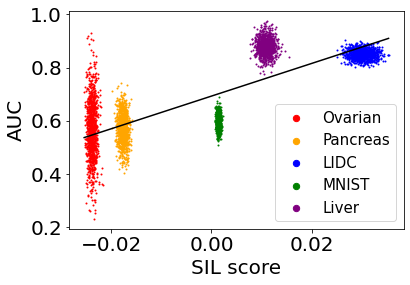

In [ ]:
## Script for plotting all values as dots (all same AUC per dataset)

# Path to csv files of bootstrapped vals
path = './Silhouette_score/Bootstrapping_scores'

plt.rcParams.update({'font.size': 20})

# # AUC scores per fold for 3DCNN model
AUCs_ovarian = [0.6539408866995073, 0.5829228243021346, 0.6120689655172414, 0.6288998357963875, 0.35714285714285715]
AUCs_pancreas = [0.4772727272727273, 0.5568181818181819, 0.6003787878787878, 0.6439393939393939, 0.5776515151515151]
AUCs_MNIST = [0.6212086917157085, 0.6123811679492983, 0.5768447261204165, 0.5511543684925305, 0.6140787686736079]
AUCs_LIDC = [0.8717008797653959, 0.8340664711632453, 0.852394916911046, 0.8318670576735092, 0.8658357771260997]
AUCs_Liver = [0.900462962962963, 0.8472222222222222, 0.8796296296296297, 0.8472222222222223, 0.9259259259259258]

# AUC scores per fold for MILCNN model
# AUCs_ovarian = [0.8123973727422004, 0.7881773399014779, 0.784072249589491, 0.7836617405582923, 0.8160919540229885]
# AUCs_pancreas = [0.8181818181818182, 0.7310606060606062, 0.7632575757575757, 0.7954545454545454, 0.7594696969696969]
# AUCs_MNIST = [0.5680172023540063, 0.5866908103214123, 0.6025350837483024, 0.5875961973743775, 0.5930285196921684]
# AUCs_LIDC = [0.936217008797654, 0.9401270772238515, 0.9420821114369502, 0.9349951124144673, 0.9301075268817204]
# AUCs_Liver = [0.9722222222222223, 0.9768518518518519, 0.9606481481481481, 0.9560185185185186, 0.9374999999999999]


AUCs_list = [AUCs_ovarian, AUCs_pancreas, AUCs_LIDC, AUCs_MNIST, AUCs_Liver]
dataset_names = ['Ovarian', 'Pancreas', 'LIDC', 'MNIST', 'Liver']
colors = ['red', 'orange', 'blue', 'green', 'purple']



X_val_list = np.array([])
y_val_list = np.array([])
for dataset_i in range(len(dataset_names)):
    data_name = dataset_names[dataset_i]
    print(f'Now processing dataset {dataset_i} ({data_name})...')

    file_name = f'SIL_scores_{data_name}.csv'
    csv_save_path = os.path.join(path, file_name)
    with open(csv_save_path, newline='') as f:
        reader = csv.reader(f)
        data = np.array(list(reader)[0]).astype(float)
        # print(data)
        # print(data.shape)
    X_val_list = np.append(X_val_list, data)
    AUC_dataset_i = AUCs_list[dataset_i]
    # Use average AUC for all points
    # AUC_average = np.average(np.array(AUC_dataset_i))
    # y_list = np.array([AUC_average]*len(data))

    # Sample AUC based on mean and std
    AUC_average = np.average(np.array(AUC_dataset_i))
    AUC_std = np.std(np.array(AUC_dataset_i))
    AUC_random_values = np.random.normal(loc=AUC_average,scale=AUC_std, size=len(data))
    y_list = AUC_random_values
    y_val_list = np.append(y_val_list, y_list)
    print('data and AUC shape:', data.shape, len(y_list))

    plt.scatter(data, y_list, c=[colors[dataset_i]], label=data_name, s=1.0)
    # plt.plot(data, y_list, color=colors[dataset_i], marker='.', label=data_name)
    

slope, intercept, r_value, p_value, std_err = linregress(X_val_list,y_val_list)

pearson_corr, p_value = stats.pearsonr(X_val_list, y_val_list)

print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation:
if p_value < 0.05:
    print("Significant correlation found!")
else:
    print("No statistically significant correlation.")



x_line_plot = np.array([np.min(X_val_list), np.max(X_val_list)])
y_list_plot = slope * x_line_plot + intercept

plt.plot(x_line_plot, y_list_plot, color = 'black')

plt.xlabel('SIL score')
plt.ylabel('AUC')
lgnd = plt.legend(loc='lower right', prop={'size': 15})
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
lgnd.legendHandles[3]._sizes = [40]
lgnd.legendHandles[4]._sizes = [40]
plt.show()